In [7]:
from gene_viz.data_loader import load_data

from gene_viz.utils import get_data_path, load_mesh_geometry, get_michack_data_path
import os

import matplotlib.pyplot as plt
from gene_viz.interpolation.load_interpolate_to_mri import plot_volumetrics, plot_volumetrics_alpha, interpolate_expression_3d, make_3d_interpolated_grid_mni, get_point_density

import pandas as pd
import numpy as np
import nibabel as nb


In [12]:
# Initialise variables 

gene_name = 'PVALB'
cmap = 'jet'
slice = int(100)


In [ ]:
# Load gene expression data 



coords, samples = load_data(gene_name)

In [ ]:
# Plot and scatter data



In [4]:
# Load in meshes

cortical_mesh_file_path = os.path.join(get_data_path(),'fs_LR.32k.L.pial.surf.gii')
mesh = load_mesh_geometry(cortical_mesh_file_path)

In [5]:
# Interpolate gene data to meshes 

from gene_viz.interpolation.interpolation_core import interpolate
interpolated_values = interpolate(samples,coords, mesh['coords'])

print(interpolated_values)

[0.59637862 0.66663608 0.79458685 ... 0.55118007 0.62592726 0.5608639 ]


In [8]:
# Load in MRI 

mri_file_path = os.path.join(get_michack_data_path(), 'MNI152_T1_1mm.nii.gz')
mni_img = nb.load(mri_file_path)

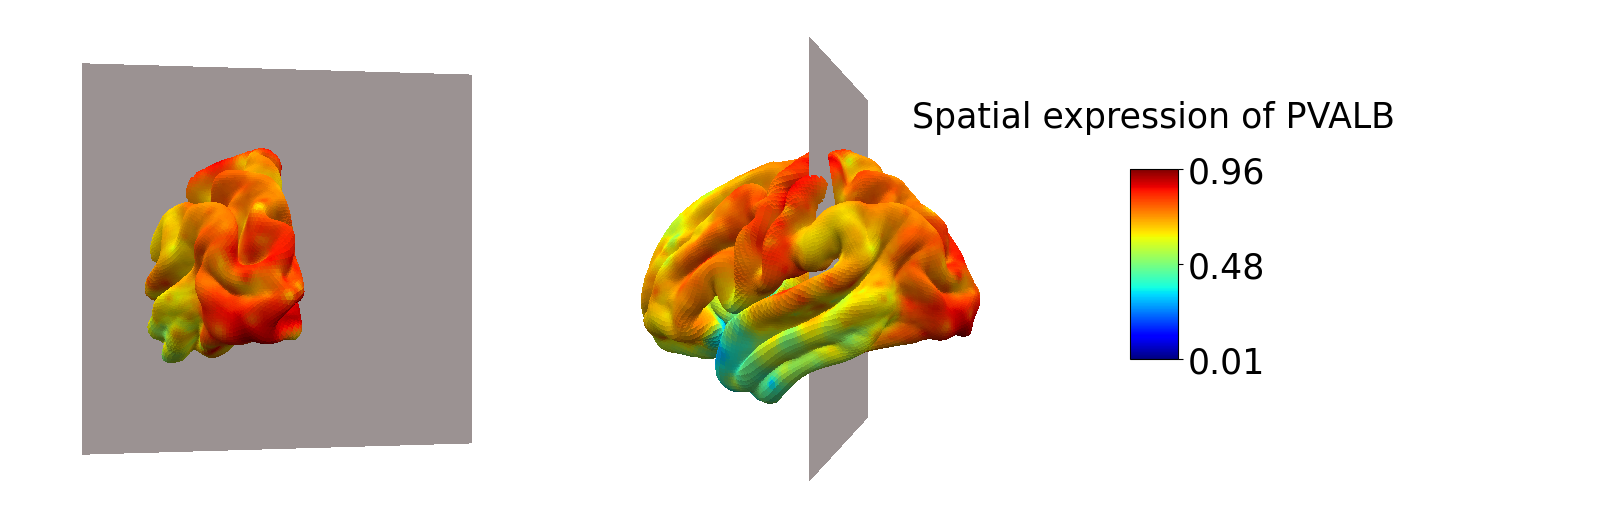

In [13]:
# Visualise data in meshes
from gene_viz.viewer.plot_surf_and_plane import plot_surf_and_plane

plot_surf_and_plane(mesh=mesh, 
                    mesh_overlay=interpolated_values, 
                    mri_img=mni_img, 
                    slice_i=slice,
                    slice_axes=1, 
                    rotate=[10, 80],
                    cmap = cmap,
                    cmap_label=f'Spatial expression of {gene_name}',
                    vmin=min(interpolated_values), vmax=max(interpolated_values)
                    )

In [ ]:
# Visualise data in slice

